# **MACHINE LEARNING DASAR #2**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from fungsi import sigmoid 

# Generate DataFrame

## Data Udin

In [2]:
# tinggi badan 
x1 = np.array([18 + 1*np.random.randn() for i in range (1, 100)])
# berat badan 
x2 = np.array([5 + 1*np.random.randn() for i in range (1, 100)])
#  status udin
y1 = np.array([1 for i in range(1, 100)])
# status asep
y2 = np.array([0 for i in range(1, 100)])
# label
label = ["udin" for i in range(1, 100)]

# data kompilasi
data_udin = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    "label":label,
}

# data frame
data_frame_1 = pd.DataFrame(data = data_udin)
print(data_frame_1)

           x1        x2  y1  y2 label
0   17.723355  5.241533   1   0  udin
1   19.063846  3.776374   1   0  udin
2   18.396649  3.511797   1   0  udin
3   18.425838  6.258987   1   0  udin
4   18.429015  4.724605   1   0  udin
..        ...       ...  ..  ..   ...
94  18.417730  4.163647   1   0  udin
95  17.941444  5.031188   1   0  udin
96  17.984217  4.304677   1   0  udin
97  19.260416  4.899364   1   0  udin
98  17.105772  5.808031   1   0  udin

[99 rows x 5 columns]


## Data Asep

In [3]:
# tinggi badan 
x1 = np.array([10 + 1*np.random.randn() for i in range (1, 100)])
# berat badan 
x2 = np.array([8 + 1*np.random.randn() for i in range (1, 100)])
#  status udin
y1 = np.array([0 for i in range(1, 100)])
# status asep
y2 = np.array([1 for i in range(1, 100)])
# label
label = ["asep" for i in range(1, 100)]

# data kompilasi
data_asep = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    "label":label,
}

# data frame
data_frame_2 = pd.DataFrame(data = data_asep)
print(data_frame_2)

           x1        x2  y1  y2 label
0   11.741163  7.233988   0   1  asep
1    8.290200  8.769032   0   1  asep
2    9.862558  6.713011   0   1  asep
3   10.101295  8.318007   0   1  asep
4   10.824847  6.518299   0   1  asep
..        ...       ...  ..  ..   ...
94  12.050721  8.655866   0   1  asep
95  10.490042  7.639943   0   1  asep
96   9.349601  9.098574   0   1  asep
97   9.135352  8.133669   0   1  asep
98   8.872788  9.664225   0   1  asep

[99 rows x 5 columns]


# Gabungkan Data

In [4]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True, drop=True)
print(data_frame)

            x1         x2  y1  y2 label
0     7.897620  10.299184   0   1  asep
1     9.666222   8.799487   0   1  asep
2    11.060493   8.632264   0   1  asep
3     9.581731   8.524368   0   1  asep
4    19.509367   4.175009   1   0  udin
..         ...        ...  ..  ..   ...
193  16.130831   5.570205   1   0  udin
194  10.143329   7.951071   0   1  asep
195  16.791859   4.130021   1   0  udin
196   9.338702   6.313277   0   1  asep
197  19.938350   5.402356   1   0  udin

[198 rows x 5 columns]


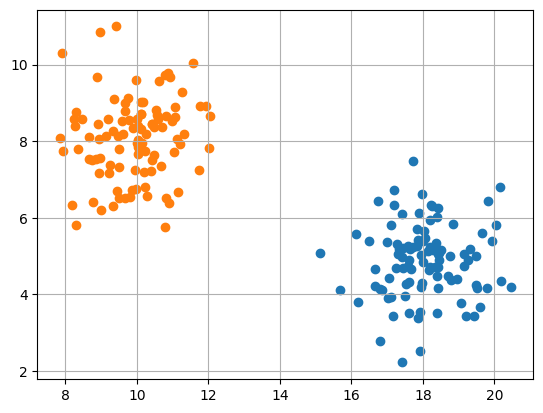

In [5]:
plt.scatter(data_frame_1.x1, data_frame_1.x2)
plt.scatter(data_frame_2.x1, data_frame_2.x2)
plt.grid(True)
plt.show()

# **Neural Network**

## 1.Matrix Weight

In [6]:
w11 = np.random.uniform(-0.01,0.01) 
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

w = np.array([[w11,w12], [w21,w22]])

print(w)

[[ 0.00558172 -0.0030734 ]
 [-0.00283579 -0.00074977]]


## 2.Iteration Neural Network

In [7]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index, baris in data_frame.iterrows():
    w_lama = w
    input = np.array([[baris.x1],[baris.x2]])
    output_hidden = np.dot(w_lama,input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1],[baris.y2]])

    error = output_actual - output_learn

    delta_w = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)
    w_baru = w_lama + delta_w
    w = w_baru

    error_array[:,index] = error.T*error.T
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "asep" if tebakan == 1 else "udin"
    
    # print(output_hidden)

    print(f"index = {index} | tebakan = {label_tebakan} | jawaban = {baris.label}")

    if tebakan == jawaban:
        answer.append(1)
    else: 
        answer.append(0)

index = 0 | tebakan = udin | jawaban = asep
index = 1 | tebakan = asep | jawaban = asep
index = 2 | tebakan = asep | jawaban = asep
index = 3 | tebakan = asep | jawaban = asep
index = 4 | tebakan = asep | jawaban = udin
index = 5 | tebakan = asep | jawaban = udin
index = 6 | tebakan = udin | jawaban = udin
index = 7 | tebakan = udin | jawaban = asep
index = 8 | tebakan = udin | jawaban = udin
index = 9 | tebakan = udin | jawaban = udin
index = 10 | tebakan = udin | jawaban = asep
index = 11 | tebakan = udin | jawaban = udin
index = 12 | tebakan = udin | jawaban = udin
index = 13 | tebakan = asep | jawaban = asep
index = 14 | tebakan = asep | jawaban = asep
index = 15 | tebakan = udin | jawaban = udin
index = 16 | tebakan = asep | jawaban = asep
index = 17 | tebakan = asep | jawaban = asep
index = 18 | tebakan = asep | jawaban = asep
index = 19 | tebakan = asep | jawaban = udin
index = 20 | tebakan = udin | jawaban = udin
index = 21 | tebakan = udin | jawaban = udin
index = 22 | tebakan

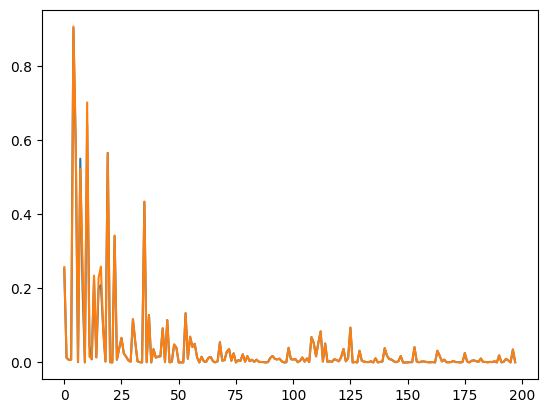

In [8]:
plt.plot(error_array.T)

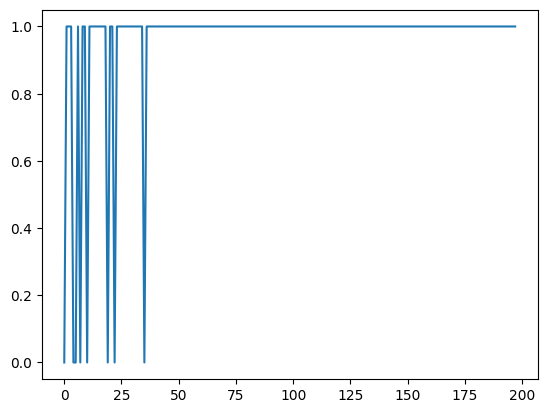

In [9]:
plt.plot(answer)

In [10]:
# tinggi badan
x1 = 18
# berat badan
x2 = 5

input = np.array([[x1], [x2]])
output_hidden =np.dot(w,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "asep" if prediction == 1 else "udin"

print(f"tinggi = {x1*10} | berat = {x2*10} | adalah = {label_prediction}")

tinggi = 180 | berat = 50 | adalah = udin
